2025-05-20 09:23:38.805853: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747733019.059815      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747733019.127869      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-20 09:23:54.955756: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


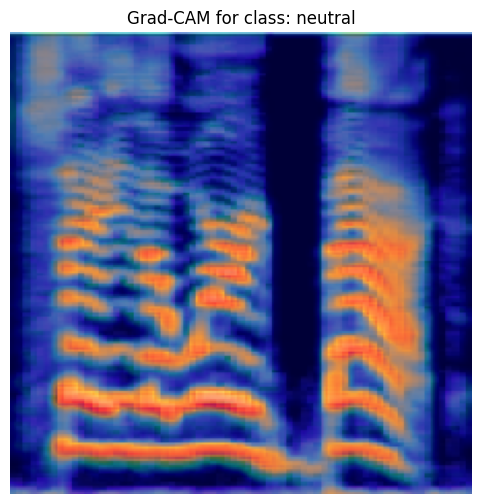

✅ Grad-CAM image saved to: gradcam_outputs/OAF_back_angry_gradcam_neutral.jpg


In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ✅ Define your class names (in the order used for training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def load_model(model_path):
    return tf.keras.models.load_model(model_path)

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_normalized = img_rgb.astype(np.float32) / 255.0
    return np.expand_dims(img_normalized, axis=0)

def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model.")

def compute_gradcam(model, image, class_index, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap + 1e-6)
    return heatmap.numpy()

def overlay_heatmap(original_image_path, heatmap, alpha=0.4):
    original_image = cv2.imread(original_image_path)
    original_image = cv2.resize(original_image, (224, 224))
    heatmap_resized = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_image, 1 - alpha, heatmap_colored, alpha, 0)
    return superimposed_img

def run_gradcam(image_path, model, save_dir="gradcam_outputs"):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    class_index = np.argmax(prediction[0])
    class_label = class_names[class_index]

    last_conv_layer_name = find_last_conv_layer(model)
    heatmap = compute_gradcam(model, preprocessed_image, class_index, last_conv_layer_name)

    gradcam_image = overlay_heatmap(image_path, heatmap)

    # ✅ Save Grad-CAM result
    os.makedirs(save_dir, exist_ok=True)
    filename = os.path.splitext(os.path.basename(image_path))[0]
    save_path = os.path.join(save_dir, f"{filename}_gradcam_{class_label}.jpg")
    cv2.imwrite(save_path, gradcam_image)

    # ✅ Display result
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(gradcam_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Grad-CAM for class: {class_label}")
    plt.show()

    print(f"✅ Grad-CAM image saved to: {save_path}")

# 🔽 Example usage
model_path = '/kaggle/input/speechemotion/tensorflow2/default/1/speech_emotion_model.h5'
image_path = '/kaggle/input/angry1datasettrain/OAF_back_angry.png'

model = load_model(model_path)
run_gradcam(image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


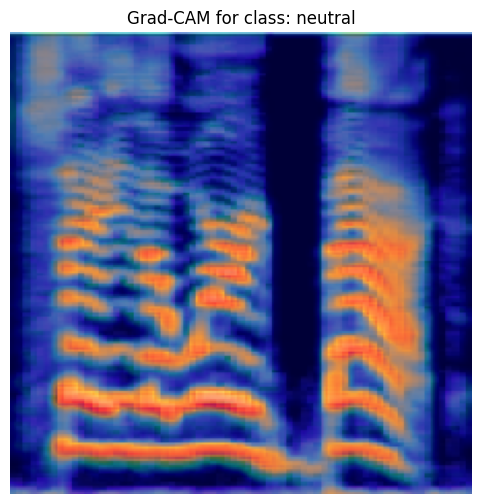

✅ Grad-CAM image saved to: gradcam_outputs/OAF_back_angry_gradcam_neutral.jpg


In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ✅ Define your class names (in the order used for training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def load_model(model_path):
    return tf.keras.models.load_model(model_path)

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_normalized = img_rgb.astype(np.float32) / 255.0
    return np.expand_dims(img_normalized, axis=0)

def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model.")

def compute_gradcam(model, image, class_index, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap + 1e-6)
    return heatmap.numpy()

def overlay_heatmap(original_image_path, heatmap, alpha=0.4):
    original_image = cv2.imread(original_image_path)
    original_image = cv2.resize(original_image, (224, 224))
    heatmap_resized = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_image, 1 - alpha, heatmap_colored, alpha, 0)
    return superimposed_img

def run_gradcam(image_path, model, save_dir="gradcam_outputs"):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    class_index = np.argmax(prediction[0])
    class_label = class_names[class_index]

    last_conv_layer_name = find_last_conv_layer(model)
    heatmap = compute_gradcam(model, preprocessed_image, class_index, last_conv_layer_name)

    gradcam_image = overlay_heatmap(image_path, heatmap)

    # ✅ Save Grad-CAM result
    os.makedirs(save_dir, exist_ok=True)
    filename = os.path.splitext(os.path.basename(image_path))[0]
    save_path = os.path.join(save_dir, f"{filename}_gradcam_{class_label}.jpg")
    cv2.imwrite(save_path, gradcam_image)

    # ✅ Display result
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(gradcam_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Grad-CAM for class: {class_label}")
    plt.show()

    print(f"✅ Grad-CAM image saved to: {save_path}")

# 🔽 Example usage
model_path = '/kaggle/input/speech-emotion00/tensorflow2/default/1/speech_emotion_model.h5'
image_path = '/kaggle/input/angry1datasettrain/OAF_back_angry.png'

model = load_model(model_path)
run_gradcam(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


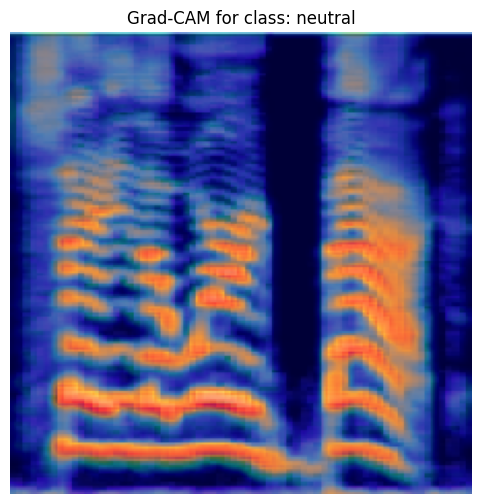

✅ Grad-CAM image saved to: gradcam_outputs/OAF_back_angry_gradcam_neutral.jpg
angry: 0.1919
disgust: 0.1222
fear: 0.0781
happy: 0.0490
neutral: 0.3916
sad: 0.1108
surprise: 0.0565


In [5]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ✅ Define your class names (in the order used for training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def load_model(model_path):
    return tf.keras.models.load_model(model_path)

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_normalized = img_rgb.astype(np.float32) / 255.0
    return np.expand_dims(img_normalized, axis=0)

def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model.")

def compute_gradcam(model, image, class_index, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap + 1e-6)
    return heatmap.numpy()

def overlay_heatmap(original_image_path, heatmap, alpha=0.4):
    original_image = cv2.imread(original_image_path)
    original_image = cv2.resize(original_image, (224, 224))
    heatmap_resized = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_image, 1 - alpha, heatmap_colored, alpha, 0)
    return superimposed_img

def run_gradcam(image_path, model, save_dir="gradcam_outputs"):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    class_index = np.argmax(prediction[0])
    class_label = class_names[class_index]

    last_conv_layer_name = find_last_conv_layer(model)
    heatmap = compute_gradcam(model, preprocessed_image, class_index, last_conv_layer_name)

    gradcam_image = overlay_heatmap(image_path, heatmap)

    # ✅ Save Grad-CAM result
    os.makedirs(save_dir, exist_ok=True)
    filename = os.path.splitext(os.path.basename(image_path))[0]
    save_path = os.path.join(save_dir, f"{filename}_gradcam_{class_label}.jpg")
    cv2.imwrite(save_path, gradcam_image)

    # ✅ Display result
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(gradcam_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Grad-CAM for class: {class_label}")
    plt.show()

    print(f"✅ Grad-CAM image saved to: {save_path}")

    # ✅ Print class probabilities
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {prediction[0][i]:.4f}")

# 🔽 Example usage
model_path = '/kaggle/input/speech-emotion00/tensorflow2/default/1/speech_emotion_model.h5'
image_path = '/kaggle/input/angry1datasettrain/OAF_back_angry.png'

model = load_model(model_path)
run_gradcam(image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


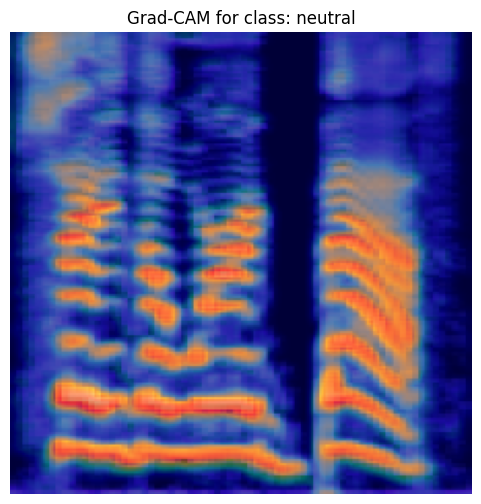

✅ Grad-CAM image saved to: gradcam_outputs/OAF_bath_angry_gradcam_neutral.jpg
angry: 0.1295
disgust: 0.1555
fear: 0.0588
happy: 0.0438
neutral: 0.3856
sad: 0.1637
surprise: 0.0631


In [7]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ✅ Define your class names (in the order used for training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def load_model(model_path):
    return tf.keras.models.load_model(model_path)

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_normalized = img_rgb.astype(np.float32) / 255.0
    return np.expand_dims(img_normalized, axis=0)

def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model.")

def compute_gradcam(model, image, class_index, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap + 1e-6)
    return heatmap.numpy()

def overlay_heatmap(original_image_path, heatmap, alpha=0.4):
    original_image = cv2.imread(original_image_path)
    original_image = cv2.resize(original_image, (224, 224))
    heatmap_resized = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_image, 1 - alpha, heatmap_colored, alpha, 0)
    return superimposed_img

def run_gradcam(image_path, model, save_dir="gradcam_outputs"):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    class_index = np.argmax(prediction[0])
    class_label = class_names[class_index]

    last_conv_layer_name = find_last_conv_layer(model)
    heatmap = compute_gradcam(model, preprocessed_image, class_index, last_conv_layer_name)

    gradcam_image = overlay_heatmap(image_path, heatmap)

    # ✅ Save Grad-CAM result
    os.makedirs(save_dir, exist_ok=True)
    filename = os.path.splitext(os.path.basename(image_path))[0]
    save_path = os.path.join(save_dir, f"{filename}_gradcam_{class_label}.jpg")
    cv2.imwrite(save_path, gradcam_image)

    # ✅ Display result
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(gradcam_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Grad-CAM for class: {class_label}")
    plt.show()

    print(f"✅ Grad-CAM image saved to: {save_path}")

    # ✅ Print class probabilities
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {prediction[0][i]:.4f}")

# 🔽 Example usage
model_path = '/kaggle/input/speech-emotion00/tensorflow2/default/1/speech_emotion_model.h5'
image_path = '/kaggle/input/angrytest1/OAF_bath_angry.png'

model = load_model(model_path)
run_gradcam(image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


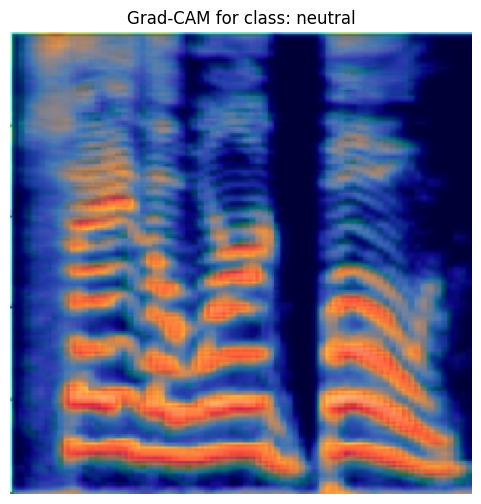

✅ Grad-CAM image saved to: gradcam_outputs/OAF_bone_angry_gradcam_neutral.jpg
angry: 0.1452
disgust: 0.2036
fear: 0.0364
happy: 0.0370
neutral: 0.3893
sad: 0.1342
surprise: 0.0542


In [9]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ✅ Define your class names (in the order used for training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def load_model(model_path):
    return tf.keras.models.load_model(model_path)

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_normalized = img_rgb.astype(np.float32) / 255.0
    return np.expand_dims(img_normalized, axis=0)

def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model.")

def compute_gradcam(model, image, class_index, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / tf.reduce_max(heatmap + 1e-6)
    return heatmap.numpy()

def overlay_heatmap(original_image_path, heatmap, alpha=0.4):
    original_image = cv2.imread(original_image_path)
    original_image = cv2.resize(original_image, (224, 224))
    heatmap_resized = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_image, 1 - alpha, heatmap_colored, alpha, 0)
    return superimposed_img

def run_gradcam(image_path, model, save_dir="gradcam_outputs"):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    class_index = np.argmax(prediction[0])
    class_label = class_names[class_index]

    last_conv_layer_name = find_last_conv_layer(model)
    heatmap = compute_gradcam(model, preprocessed_image, class_index, last_conv_layer_name)

    gradcam_image = overlay_heatmap(image_path, heatmap)

    # ✅ Save Grad-CAM result
    os.makedirs(save_dir, exist_ok=True)
    filename = os.path.splitext(os.path.basename(image_path))[0]
    save_path = os.path.join(save_dir, f"{filename}_gradcam_{class_label}.jpg")
    cv2.imwrite(save_path, gradcam_image)

    # ✅ Display result
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(gradcam_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Grad-CAM for class: {class_label}")
    plt.show()

    print(f"✅ Grad-CAM image saved to: {save_path}")

    # ✅ Print class probabilities
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {prediction[0][i]:.4f}")

# 🔽 Example usage
model_path = '/kaggle/input/speech-emotion00/tensorflow2/default/1/speech_emotion_model.h5'
image_path = '/kaggle/input/angry2test/OAF_bone_angry.png'

model = load_model(model_path)
run_gradcam(image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


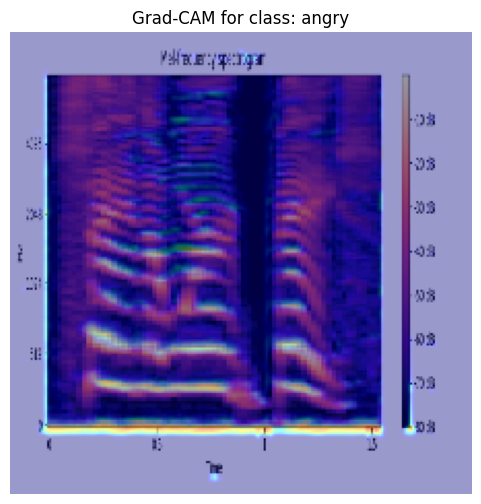

✅ Grad-CAM image saved to: gradcam_outputs/OAF_base_angry_gradcam_angry.jpg

Grad-CAM Analysis for class: angry
Metric               Value
------------------------------
Model Confidence      65.00% (angry)
 Grad-CAM Max Activation  = 0.96
Activated Area         = 1.48%,
 Focus Region (time: 0.22–2.59s, freq: 3082.6–6899.1Hz)
Confidence Drop (after masking focus region) = -2.24%
mean_activation      0.05784212
max_activation       0.96128160
activated_area_pct   1.48
entropy              8.037
time_focus_range     (0.22, 2.59)
freq_focus_range     (3082.6, 6899.1)

Class probabilities:
angry: 0.6500
disgust: 0.0858
fear: 0.1137
happy: 0.0245
neutral: 0.0542
sad: 0.0307
surprise: 0.0411


In [16]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ✅ Define your class names (in the order used for training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def load_model(model_path):
    return tf.keras.models.load_model(model_path)

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_normalized = img_rgb.astype(np.float32) / 255.0
    return np.expand_dims(img_normalized, axis=0)

def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model.")

def compute_gradcam(model, image, class_index, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-6)
    return heatmap.numpy(), predictions.numpy()

def overlay_heatmap(original_image_path, heatmap, alpha=0.4):
    original_image = cv2.imread(original_image_path)
    original_image = cv2.resize(original_image, (224, 224))
    heatmap_resized = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_image, 1 - alpha, heatmap_colored, alpha, 0)
    return superimposed_img, heatmap_resized

def mask_focus_region(image, heatmap_resized, threshold=0.5):
    # Mask out heatmap regions above threshold in the image (for confidence drop calc)
    mask = heatmap_resized > threshold
    masked_image = image.copy()
    # Set masked region pixels to zero (or blur)
    masked_image[mask] = 0
    return masked_image

def calculate_entropy(heatmap):
    # Normalize heatmap to sum to 1 (prob distribution)
    prob_dist = heatmap.flatten()
    prob_dist = prob_dist / (np.sum(prob_dist) + 1e-9)
    entropy = -np.sum(prob_dist * np.log(prob_dist + 1e-9))
    return entropy

def compute_iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    if union == 0:
        return 0.0
    return intersection / union

def run_gradcam(image_path, model, save_dir="gradcam_outputs", ground_truth_mask_path=None):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    class_index = np.argmax(prediction[0])
    class_label = class_names[class_index]
    model_confidence = prediction[0][class_index]

    last_conv_layer_name = find_last_conv_layer(model)
    heatmap, prediction = compute_gradcam(model, preprocessed_image, class_index, last_conv_layer_name)

    original_image = cv2.imread(image_path)
    original_image = cv2.resize(original_image, (224, 224))

    gradcam_image, heatmap_resized = overlay_heatmap(image_path, heatmap)

    # Metrics:
    max_activation = np.max(heatmap)
    activated_area_pct = np.sum(heatmap > 0.5) / heatmap.size * 100
    entropy = calculate_entropy(heatmap)

    # Dummy time and frequency axis ranges for mapping pixel indexes (since no info given)
    total_time_sec = 3.0
    total_freq_hz = 8000.0
    time_resolution = total_time_sec / heatmap.shape[1]
    freq_resolution = total_freq_hz / heatmap.shape[0]

    # Calculate time and freq focus ranges where heatmap > 0.5
    indices = np.argwhere(heatmap > 0.5)
    if indices.size > 0:
        freq_indices = indices[:, 0]
        time_indices = indices[:, 1]
        time_focus_range = (round(time_indices.min() * time_resolution, 2), round(time_indices.max() * time_resolution, 2))
        freq_focus_range = (round(freq_indices.min() * freq_resolution, 1), round(freq_indices.max() * freq_resolution, 1))
    else:
        time_focus_range = (0, 0)
        freq_focus_range = (0, 0)

    # Calculate Confidence drop after masking focus region:
    threshold = 0.5
    mask = heatmap_resized > threshold
    masked_image = mask_focus_region(original_image, heatmap_resized, threshold)

    # Preprocess masked image for model prediction
    masked_image_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
    masked_image_norm = masked_image_rgb.astype(np.float32) / 255.0
    masked_image_input = np.expand_dims(masked_image_norm, axis=0)
    masked_prediction = model.predict(masked_image_input)
    masked_confidence = masked_prediction[0][class_index]

    confidence_drop = (model_confidence - masked_confidence) / (model_confidence + 1e-9) * 100

    # IOU with ground truth segmentation if provided:
    if ground_truth_mask_path:
        gt_mask = cv2.imread(ground_truth_mask_path, cv2.IMREAD_GRAYSCALE)
        gt_mask = cv2.resize(gt_mask, (heatmap.shape[1], heatmap.shape[0]))
        gt_binary = gt_mask > 128
        pred_binary = heatmap > 0.5
        iou_score = compute_iou(gt_binary, pred_binary)
    else:
        iou_score = None

    # Save Grad-CAM result
    os.makedirs(save_dir, exist_ok=True)
    filename = os.path.splitext(os.path.basename(image_path))[0]
    save_path = os.path.join(save_dir, f"{filename}_gradcam_{class_label}.jpg")
    cv2.imwrite(save_path, gradcam_image)

    # Display Grad-CAM
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(gradcam_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Grad-CAM for class: {class_label}")
    plt.show()

    print(f"✅ Grad-CAM image saved to: {save_path}")

    # Print all metrics:
    print(f"\nGrad-CAM Analysis for class: {class_label}")
    print(f"{'Metric':<20} {'Value'}")
    print("-" * 30)
    print(f"Model Confidence      {model_confidence:.2%} ({class_label})")
    print(f" Grad-CAM Max Activation  = {max_activation:.2f}")
    print(f"Activated Area         = {activated_area_pct:.2f}%,")
    print(f" Focus Region (time: {time_focus_range[0]}–{time_focus_range[1]}s, freq: {freq_focus_range[0]}–{freq_focus_range[1]}Hz)")
    print(f"Confidence Drop (after masking focus region) = {confidence_drop:.2f}%")
    if iou_score is not None:
        print(f" (If ground truth segmentation exists) IOU = {iou_score:.2f}")

    print(f"mean_activation      {np.mean(heatmap):.8f}")
    print(f"max_activation       {max_activation:.8f}")
    print(f"activated_area_pct   {activated_area_pct:.2f}")
    print(f"entropy              {entropy:.3f}")
    print(f"time_focus_range     {time_focus_range}")
    print(f"freq_focus_range     {freq_focus_range}")

    # Also print all class probabilities with 4 decimals
    print("\nClass probabilities:")
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {prediction[0][i]:.4f}")

# 🔽 Example usage
model_path = '/kaggle/input/speech-emotion00/tensorflow2/default/1/speech_emotion_model.h5'
image_path = '/kaggle/input/speechemomel/Melspectro/train/angry/OAF_base_angry.png'

model = load_model(model_path)
run_gradcam(image_path, model)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


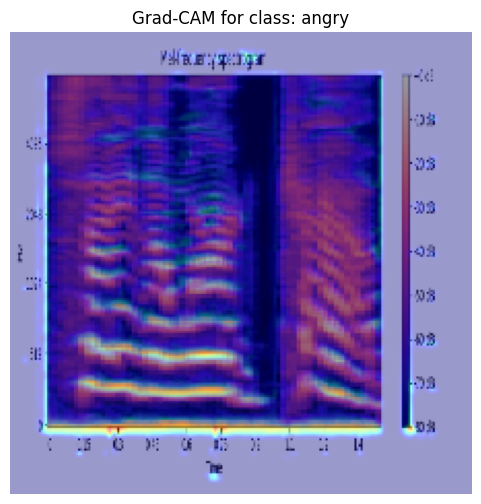

✅ Grad-CAM image saved to: gradcam_outputs/OAF_cab_angry_gradcam_angry.jpg

Grad-CAM Analysis for class: angry
Metric               Value
------------------------------
Model Confidence      77.49% (angry)
 Grad-CAM Max Activation  = 0.96
Activated Area         = 1.74%,
 Focus Region (time: 0.22–2.59s, freq: 367.0–6899.1Hz)
Confidence Drop (after masking focus region) = -0.54%
mean_activation      0.07643380
max_activation       0.95776683
activated_area_pct   1.74
entropy              8.311
time_focus_range     (0.22, 2.59)
freq_focus_range     (367.0, 6899.1)

Class probabilities:
angry: 0.7749
disgust: 0.0581
fear: 0.0383
happy: 0.0150
neutral: 0.0417
sad: 0.0208
surprise: 0.0511


In [18]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ✅ Define your class names (in the order used for training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def load_model(model_path):
    return tf.keras.models.load_model(model_path)

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_normalized = img_rgb.astype(np.float32) / 255.0
    return np.expand_dims(img_normalized, axis=0)

def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model.")

def compute_gradcam(model, image, class_index, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-6)
    return heatmap.numpy(), predictions.numpy()

def overlay_heatmap(original_image_path, heatmap, alpha=0.4):
    original_image = cv2.imread(original_image_path)
    original_image = cv2.resize(original_image, (224, 224))
    heatmap_resized = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_image, 1 - alpha, heatmap_colored, alpha, 0)
    return superimposed_img, heatmap_resized

def mask_focus_region(image, heatmap_resized, threshold=0.5):
    # Mask out heatmap regions above threshold in the image (for confidence drop calc)
    mask = heatmap_resized > threshold
    masked_image = image.copy()
    # Set masked region pixels to zero (or blur)
    masked_image[mask] = 0
    return masked_image

def calculate_entropy(heatmap):
    # Normalize heatmap to sum to 1 (prob distribution)
    prob_dist = heatmap.flatten()
    prob_dist = prob_dist / (np.sum(prob_dist) + 1e-9)
    entropy = -np.sum(prob_dist * np.log(prob_dist + 1e-9))
    return entropy

def compute_iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    if union == 0:
        return 0.0
    return intersection / union

def run_gradcam(image_path, model, save_dir="gradcam_outputs", ground_truth_mask_path=None):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    class_index = np.argmax(prediction[0])
    class_label = class_names[class_index]
    model_confidence = prediction[0][class_index]

    last_conv_layer_name = find_last_conv_layer(model)
    heatmap, prediction = compute_gradcam(model, preprocessed_image, class_index, last_conv_layer_name)

    original_image = cv2.imread(image_path)
    original_image = cv2.resize(original_image, (224, 224))

    gradcam_image, heatmap_resized = overlay_heatmap(image_path, heatmap)

    # Metrics:
    max_activation = np.max(heatmap)
    activated_area_pct = np.sum(heatmap > 0.5) / heatmap.size * 100
    entropy = calculate_entropy(heatmap)

    # Dummy time and frequency axis ranges for mapping pixel indexes (since no info given)
    total_time_sec = 3.0
    total_freq_hz = 8000.0
    time_resolution = total_time_sec / heatmap.shape[1]
    freq_resolution = total_freq_hz / heatmap.shape[0]

    # Calculate time and freq focus ranges where heatmap > 0.5
    indices = np.argwhere(heatmap > 0.5)
    if indices.size > 0:
        freq_indices = indices[:, 0]
        time_indices = indices[:, 1]
        time_focus_range = (round(time_indices.min() * time_resolution, 2), round(time_indices.max() * time_resolution, 2))
        freq_focus_range = (round(freq_indices.min() * freq_resolution, 1), round(freq_indices.max() * freq_resolution, 1))
    else:
        time_focus_range = (0, 0)
        freq_focus_range = (0, 0)

    # Calculate Confidence drop after masking focus region:
    threshold = 0.5
    mask = heatmap_resized > threshold
    masked_image = mask_focus_region(original_image, heatmap_resized, threshold)

    # Preprocess masked image for model prediction
    masked_image_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
    masked_image_norm = masked_image_rgb.astype(np.float32) / 255.0
    masked_image_input = np.expand_dims(masked_image_norm, axis=0)
    masked_prediction = model.predict(masked_image_input)
    masked_confidence = masked_prediction[0][class_index]

    confidence_drop = (model_confidence - masked_confidence) / (model_confidence + 1e-9) * 100

    # IOU with ground truth segmentation if provided:
    if ground_truth_mask_path:
        gt_mask = cv2.imread(ground_truth_mask_path, cv2.IMREAD_GRAYSCALE)
        gt_mask = cv2.resize(gt_mask, (heatmap.shape[1], heatmap.shape[0]))
        gt_binary = gt_mask > 128
        pred_binary = heatmap > 0.5
        iou_score = compute_iou(gt_binary, pred_binary)
    else:
        iou_score = None

    # Save Grad-CAM result
    os.makedirs(save_dir, exist_ok=True)
    filename = os.path.splitext(os.path.basename(image_path))[0]
    save_path = os.path.join(save_dir, f"{filename}_gradcam_{class_label}.jpg")
    cv2.imwrite(save_path, gradcam_image)

    # Display Grad-CAM
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(gradcam_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Grad-CAM for class: {class_label}")
    plt.show()

    print(f"✅ Grad-CAM image saved to: {save_path}")

    # Print all metrics:
    print(f"\nGrad-CAM Analysis for class: {class_label}")
    print(f"{'Metric':<20} {'Value'}")
    print("-" * 30)
    print(f"Model Confidence      {model_confidence:.2%} ({class_label})")
    print(f" Grad-CAM Max Activation  = {max_activation:.2f}")
    print(f"Activated Area         = {activated_area_pct:.2f}%,")
    print(f" Focus Region (time: {time_focus_range[0]}–{time_focus_range[1]}s, freq: {freq_focus_range[0]}–{freq_focus_range[1]}Hz)")
    print(f"Confidence Drop (after masking focus region) = {confidence_drop:.2f}%")
    if iou_score is not None:
        print(f" (If ground truth segmentation exists) IOU = {iou_score:.2f}")

    print(f"mean_activation      {np.mean(heatmap):.8f}")
    print(f"max_activation       {max_activation:.8f}")
    print(f"activated_area_pct   {activated_area_pct:.2f}")
    print(f"entropy              {entropy:.3f}")
    print(f"time_focus_range     {time_focus_range}")
    print(f"freq_focus_range     {freq_focus_range}")

    # Also print all class probabilities with 4 decimals
    print("\nClass probabilities:")
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {prediction[0][i]:.4f}")

# 🔽 Example usage
model_path = '/kaggle/input/speech-emotion00/tensorflow2/default/1/speech_emotion_model.h5'
image_path = '/kaggle/input/speechemomel/Melspectro/test/angry/OAF_cab_angry.png'

model = load_model(model_path)
run_gradcam(image_path, model)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


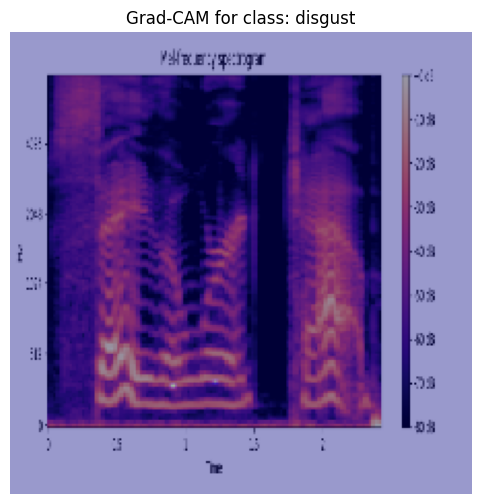

✅ Grad-CAM image saved to: gradcam_outputs/OAF_cab_disgust_gradcam_disgust.jpg

Grad-CAM Analysis for class: disgust
Metric               Value
------------------------------
Model Confidence      52.23% (disgust)
 Grad-CAM Max Activation  = 0.53
Activated Area         = 0.01%,
 Focus Region (time: 1.05–1.05s, freq: 6091.7–6091.7Hz)
Confidence Drop (after masking focus region) = 0.00%
mean_activation      0.00008228
max_activation       0.52723080
activated_area_pct   0.01
entropy              1.018
time_focus_range     (1.05, 1.05)
freq_focus_range     (6091.7, 6091.7)

Class probabilities:
angry: 0.0208
disgust: 0.5223
fear: 0.0502
happy: 0.1162
neutral: 0.0984
sad: 0.0924
surprise: 0.0996


In [20]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ✅ Define your class names (in the order used for training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def load_model(model_path):
    return tf.keras.models.load_model(model_path)

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_normalized = img_rgb.astype(np.float32) / 255.0
    return np.expand_dims(img_normalized, axis=0)

def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model.")

def compute_gradcam(model, image, class_index, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-6)
    return heatmap.numpy(), predictions.numpy()

def overlay_heatmap(original_image_path, heatmap, alpha=0.4):
    original_image = cv2.imread(original_image_path)
    original_image = cv2.resize(original_image, (224, 224))
    heatmap_resized = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_image, 1 - alpha, heatmap_colored, alpha, 0)
    return superimposed_img, heatmap_resized

def mask_focus_region(image, heatmap_resized, threshold=0.5):
    # Mask out heatmap regions above threshold in the image (for confidence drop calc)
    mask = heatmap_resized > threshold
    masked_image = image.copy()
    # Set masked region pixels to zero (or blur)
    masked_image[mask] = 0
    return masked_image

def calculate_entropy(heatmap):
    # Normalize heatmap to sum to 1 (prob distribution)
    prob_dist = heatmap.flatten()
    prob_dist = prob_dist / (np.sum(prob_dist) + 1e-9)
    entropy = -np.sum(prob_dist * np.log(prob_dist + 1e-9))
    return entropy

def compute_iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    if union == 0:
        return 0.0
    return intersection / union

def run_gradcam(image_path, model, save_dir="gradcam_outputs", ground_truth_mask_path=None):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    class_index = np.argmax(prediction[0])
    class_label = class_names[class_index]
    model_confidence = prediction[0][class_index]

    last_conv_layer_name = find_last_conv_layer(model)
    heatmap, prediction = compute_gradcam(model, preprocessed_image, class_index, last_conv_layer_name)

    original_image = cv2.imread(image_path)
    original_image = cv2.resize(original_image, (224, 224))

    gradcam_image, heatmap_resized = overlay_heatmap(image_path, heatmap)

    # Metrics:
    max_activation = np.max(heatmap)
    activated_area_pct = np.sum(heatmap > 0.5) / heatmap.size * 100
    entropy = calculate_entropy(heatmap)

    # Dummy time and frequency axis ranges for mapping pixel indexes (since no info given)
    total_time_sec = 3.0
    total_freq_hz = 8000.0
    time_resolution = total_time_sec / heatmap.shape[1]
    freq_resolution = total_freq_hz / heatmap.shape[0]

    # Calculate time and freq focus ranges where heatmap > 0.5
    indices = np.argwhere(heatmap > 0.5)
    if indices.size > 0:
        freq_indices = indices[:, 0]
        time_indices = indices[:, 1]
        time_focus_range = (round(time_indices.min() * time_resolution, 2), round(time_indices.max() * time_resolution, 2))
        freq_focus_range = (round(freq_indices.min() * freq_resolution, 1), round(freq_indices.max() * freq_resolution, 1))
    else:
        time_focus_range = (0, 0)
        freq_focus_range = (0, 0)

    # Calculate Confidence drop after masking focus region:
    threshold = 0.5
    mask = heatmap_resized > threshold
    masked_image = mask_focus_region(original_image, heatmap_resized, threshold)

    # Preprocess masked image for model prediction
    masked_image_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
    masked_image_norm = masked_image_rgb.astype(np.float32) / 255.0
    masked_image_input = np.expand_dims(masked_image_norm, axis=0)
    masked_prediction = model.predict(masked_image_input)
    masked_confidence = masked_prediction[0][class_index]

    confidence_drop = (model_confidence - masked_confidence) / (model_confidence + 1e-9) * 100

    # IOU with ground truth segmentation if provided:
    if ground_truth_mask_path:
        gt_mask = cv2.imread(ground_truth_mask_path, cv2.IMREAD_GRAYSCALE)
        gt_mask = cv2.resize(gt_mask, (heatmap.shape[1], heatmap.shape[0]))
        gt_binary = gt_mask > 128
        pred_binary = heatmap > 0.5
        iou_score = compute_iou(gt_binary, pred_binary)
    else:
        iou_score = None

    # Save Grad-CAM result
    os.makedirs(save_dir, exist_ok=True)
    filename = os.path.splitext(os.path.basename(image_path))[0]
    save_path = os.path.join(save_dir, f"{filename}_gradcam_{class_label}.jpg")
    cv2.imwrite(save_path, gradcam_image)

    # Display Grad-CAM
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(gradcam_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Grad-CAM for class: {class_label}")
    plt.show()

    print(f"✅ Grad-CAM image saved to: {save_path}")

    # Print all metrics:
    print(f"\nGrad-CAM Analysis for class: {class_label}")
    print(f"{'Metric':<20} {'Value'}")
    print("-" * 30)
    print(f"Model Confidence      {model_confidence:.2%} ({class_label})")
    print(f" Grad-CAM Max Activation  = {max_activation:.2f}")
    print(f"Activated Area         = {activated_area_pct:.2f}%,")
    print(f" Focus Region (time: {time_focus_range[0]}–{time_focus_range[1]}s, freq: {freq_focus_range[0]}–{freq_focus_range[1]}Hz)")
    print(f"Confidence Drop (after masking focus region) = {confidence_drop:.2f}%")
    if iou_score is not None:
        print(f" (If ground truth segmentation exists) IOU = {iou_score:.2f}")

    print(f"mean_activation      {np.mean(heatmap):.8f}")
    print(f"max_activation       {max_activation:.8f}")
    print(f"activated_area_pct   {activated_area_pct:.2f}")
    print(f"entropy              {entropy:.3f}")
    print(f"time_focus_range     {time_focus_range}")
    print(f"freq_focus_range     {freq_focus_range}")

    # Also print all class probabilities with 4 decimals
    print("\nClass probabilities:")
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {prediction[0][i]:.4f}")

# 🔽 Example usage
model_path = '/kaggle/input/speech-emotion00/tensorflow2/default/1/speech_emotion_model.h5'
image_path = '/kaggle/input/speechemomel/Melspectro/test/disgust/OAF_cab_disgust.png'

model = load_model(model_path)
run_gradcam(image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


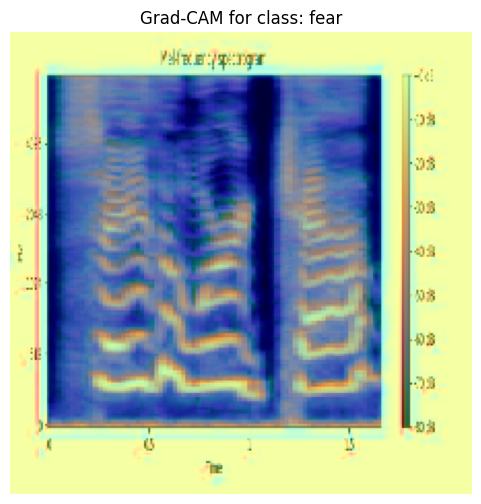

✅ Grad-CAM image saved to: gradcam_outputs/OAF_cab_fear_gradcam_fear.jpg

Grad-CAM Analysis for class: fear
Metric               Value
------------------------------
Model Confidence      54.73% (fear)
 Grad-CAM Max Activation  = 0.98
Activated Area         = 44.20%,
 Focus Region (time: 0.0–2.97s, freq: 0.0–7926.6Hz)
Confidence Drop (after masking focus region) = 19.66%
mean_activation      0.44908139
max_activation       0.98126942
activated_area_pct   44.20
entropy              9.310
time_focus_range     (0.0, 2.97)
freq_focus_range     (0.0, 7926.6)

Class probabilities:
angry: 0.0625
disgust: 0.0671
fear: 0.5473
happy: 0.1223
neutral: 0.0554
sad: 0.0178
surprise: 0.1277


In [22]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ✅ Define your class names (in the order used for training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def load_model(model_path):
    return tf.keras.models.load_model(model_path)

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_normalized = img_rgb.astype(np.float32) / 255.0
    return np.expand_dims(img_normalized, axis=0)

def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model.")

def compute_gradcam(model, image, class_index, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-6)
    return heatmap.numpy(), predictions.numpy()

def overlay_heatmap(original_image_path, heatmap, alpha=0.4):
    original_image = cv2.imread(original_image_path)
    original_image = cv2.resize(original_image, (224, 224))
    heatmap_resized = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_image, 1 - alpha, heatmap_colored, alpha, 0)
    return superimposed_img, heatmap_resized

def mask_focus_region(image, heatmap_resized, threshold=0.5):
    # Mask out heatmap regions above threshold in the image (for confidence drop calc)
    mask = heatmap_resized > threshold
    masked_image = image.copy()
    # Set masked region pixels to zero (or blur)
    masked_image[mask] = 0
    return masked_image

def calculate_entropy(heatmap):
    # Normalize heatmap to sum to 1 (prob distribution)
    prob_dist = heatmap.flatten()
    prob_dist = prob_dist / (np.sum(prob_dist) + 1e-9)
    entropy = -np.sum(prob_dist * np.log(prob_dist + 1e-9))
    return entropy

def compute_iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    if union == 0:
        return 0.0
    return intersection / union

def run_gradcam(image_path, model, save_dir="gradcam_outputs", ground_truth_mask_path=None):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    class_index = np.argmax(prediction[0])
    class_label = class_names[class_index]
    model_confidence = prediction[0][class_index]

    last_conv_layer_name = find_last_conv_layer(model)
    heatmap, prediction = compute_gradcam(model, preprocessed_image, class_index, last_conv_layer_name)

    original_image = cv2.imread(image_path)
    original_image = cv2.resize(original_image, (224, 224))

    gradcam_image, heatmap_resized = overlay_heatmap(image_path, heatmap)

    # Metrics:
    max_activation = np.max(heatmap)
    activated_area_pct = np.sum(heatmap > 0.5) / heatmap.size * 100
    entropy = calculate_entropy(heatmap)

    # Dummy time and frequency axis ranges for mapping pixel indexes (since no info given)
    total_time_sec = 3.0
    total_freq_hz = 8000.0
    time_resolution = total_time_sec / heatmap.shape[1]
    freq_resolution = total_freq_hz / heatmap.shape[0]

    # Calculate time and freq focus ranges where heatmap > 0.5
    indices = np.argwhere(heatmap > 0.5)
    if indices.size > 0:
        freq_indices = indices[:, 0]
        time_indices = indices[:, 1]
        time_focus_range = (round(time_indices.min() * time_resolution, 2), round(time_indices.max() * time_resolution, 2))
        freq_focus_range = (round(freq_indices.min() * freq_resolution, 1), round(freq_indices.max() * freq_resolution, 1))
    else:
        time_focus_range = (0, 0)
        freq_focus_range = (0, 0)

    # Calculate Confidence drop after masking focus region:
    threshold = 0.5
    mask = heatmap_resized > threshold
    masked_image = mask_focus_region(original_image, heatmap_resized, threshold)

    # Preprocess masked image for model prediction
    masked_image_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
    masked_image_norm = masked_image_rgb.astype(np.float32) / 255.0
    masked_image_input = np.expand_dims(masked_image_norm, axis=0)
    masked_prediction = model.predict(masked_image_input)
    masked_confidence = masked_prediction[0][class_index]

    confidence_drop = (model_confidence - masked_confidence) / (model_confidence + 1e-9) * 100

    # IOU with ground truth segmentation if provided:
    if ground_truth_mask_path:
        gt_mask = cv2.imread(ground_truth_mask_path, cv2.IMREAD_GRAYSCALE)
        gt_mask = cv2.resize(gt_mask, (heatmap.shape[1], heatmap.shape[0]))
        gt_binary = gt_mask > 128
        pred_binary = heatmap > 0.5
        iou_score = compute_iou(gt_binary, pred_binary)
    else:
        iou_score = None

    # Save Grad-CAM result
    os.makedirs(save_dir, exist_ok=True)
    filename = os.path.splitext(os.path.basename(image_path))[0]
    save_path = os.path.join(save_dir, f"{filename}_gradcam_{class_label}.jpg")
    cv2.imwrite(save_path, gradcam_image)

    # Display Grad-CAM
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(gradcam_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Grad-CAM for class: {class_label}")
    plt.show()

    print(f"✅ Grad-CAM image saved to: {save_path}")

    # Print all metrics:
    print(f"\nGrad-CAM Analysis for class: {class_label}")
    print(f"{'Metric':<20} {'Value'}")
    print("-" * 30)
    print(f"Model Confidence      {model_confidence:.2%} ({class_label})")
    print(f" Grad-CAM Max Activation  = {max_activation:.2f}")
    print(f"Activated Area         = {activated_area_pct:.2f}%,")
    print(f" Focus Region (time: {time_focus_range[0]}–{time_focus_range[1]}s, freq: {freq_focus_range[0]}–{freq_focus_range[1]}Hz)")
    print(f"Confidence Drop (after masking focus region) = {confidence_drop:.2f}%")
    if iou_score is not None:
        print(f" (If ground truth segmentation exists) IOU = {iou_score:.2f}")

    print(f"mean_activation      {np.mean(heatmap):.8f}")
    print(f"max_activation       {max_activation:.8f}")
    print(f"activated_area_pct   {activated_area_pct:.2f}")
    print(f"entropy              {entropy:.3f}")
    print(f"time_focus_range     {time_focus_range}")
    print(f"freq_focus_range     {freq_focus_range}")

    # Also print all class probabilities with 4 decimals
    print("\nClass probabilities:")
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {prediction[0][i]:.4f}")

# 🔽 Example usage
model_path = '/kaggle/input/speech-emotion00/tensorflow2/default/1/speech_emotion_model.h5'
image_path = '/kaggle/input/speechemomel/Melspectro/test/fear/OAF_cab_fear.png'

model = load_model(model_path)
run_gradcam(image_path, model)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


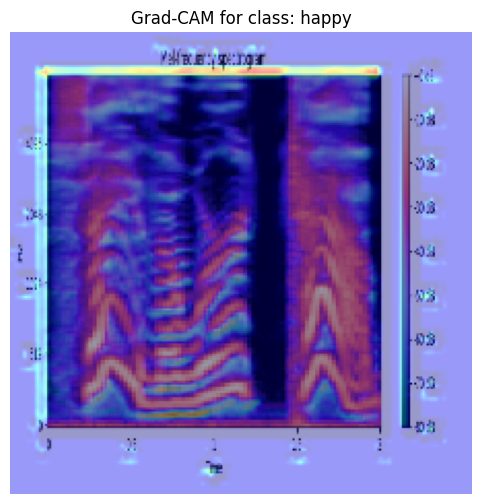

✅ Grad-CAM image saved to: gradcam_outputs/OAF_cab_happy_gradcam_happy.jpg

Grad-CAM Analysis for class: happy
Metric               Value
------------------------------
Model Confidence      71.81% (happy)
 Grad-CAM Max Activation  = 0.94
Activated Area         = 1.62%,
 Focus Region (time: 0.17–2.72s, freq: 293.6–7559.6Hz)
Confidence Drop (after masking focus region) = -0.99%
mean_activation      0.12068452
max_activation       0.93679237
activated_area_pct   1.62
entropy              8.858
time_focus_range     (0.17, 2.72)
freq_focus_range     (293.6, 7559.6)

Class probabilities:
angry: 0.0179
disgust: 0.0326
fear: 0.0432
happy: 0.7181
neutral: 0.0663
sad: 0.0266
surprise: 0.0953


In [24]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ✅ Define your class names (in the order used for training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def load_model(model_path):
    return tf.keras.models.load_model(model_path)

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_normalized = img_rgb.astype(np.float32) / 255.0
    return np.expand_dims(img_normalized, axis=0)

def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model.")

def compute_gradcam(model, image, class_index, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-6)
    return heatmap.numpy(), predictions.numpy()

def overlay_heatmap(original_image_path, heatmap, alpha=0.4):
    original_image = cv2.imread(original_image_path)
    original_image = cv2.resize(original_image, (224, 224))
    heatmap_resized = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_image, 1 - alpha, heatmap_colored, alpha, 0)
    return superimposed_img, heatmap_resized

def mask_focus_region(image, heatmap_resized, threshold=0.5):
    # Mask out heatmap regions above threshold in the image (for confidence drop calc)
    mask = heatmap_resized > threshold
    masked_image = image.copy()
    # Set masked region pixels to zero (or blur)
    masked_image[mask] = 0
    return masked_image

def calculate_entropy(heatmap):
    # Normalize heatmap to sum to 1 (prob distribution)
    prob_dist = heatmap.flatten()
    prob_dist = prob_dist / (np.sum(prob_dist) + 1e-9)
    entropy = -np.sum(prob_dist * np.log(prob_dist + 1e-9))
    return entropy

def compute_iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    if union == 0:
        return 0.0
    return intersection / union

def run_gradcam(image_path, model, save_dir="gradcam_outputs", ground_truth_mask_path=None):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    class_index = np.argmax(prediction[0])
    class_label = class_names[class_index]
    model_confidence = prediction[0][class_index]

    last_conv_layer_name = find_last_conv_layer(model)
    heatmap, prediction = compute_gradcam(model, preprocessed_image, class_index, last_conv_layer_name)

    original_image = cv2.imread(image_path)
    original_image = cv2.resize(original_image, (224, 224))

    gradcam_image, heatmap_resized = overlay_heatmap(image_path, heatmap)

    # Metrics:
    max_activation = np.max(heatmap)
    activated_area_pct = np.sum(heatmap > 0.5) / heatmap.size * 100
    entropy = calculate_entropy(heatmap)

    # Dummy time and frequency axis ranges for mapping pixel indexes (since no info given)
    total_time_sec = 3.0
    total_freq_hz = 8000.0
    time_resolution = total_time_sec / heatmap.shape[1]
    freq_resolution = total_freq_hz / heatmap.shape[0]

    # Calculate time and freq focus ranges where heatmap > 0.5
    indices = np.argwhere(heatmap > 0.5)
    if indices.size > 0:
        freq_indices = indices[:, 0]
        time_indices = indices[:, 1]
        time_focus_range = (round(time_indices.min() * time_resolution, 2), round(time_indices.max() * time_resolution, 2))
        freq_focus_range = (round(freq_indices.min() * freq_resolution, 1), round(freq_indices.max() * freq_resolution, 1))
    else:
        time_focus_range = (0, 0)
        freq_focus_range = (0, 0)

    # Calculate Confidence drop after masking focus region:
    threshold = 0.5
    mask = heatmap_resized > threshold
    masked_image = mask_focus_region(original_image, heatmap_resized, threshold)

    # Preprocess masked image for model prediction
    masked_image_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
    masked_image_norm = masked_image_rgb.astype(np.float32) / 255.0
    masked_image_input = np.expand_dims(masked_image_norm, axis=0)
    masked_prediction = model.predict(masked_image_input)
    masked_confidence = masked_prediction[0][class_index]

    confidence_drop = (model_confidence - masked_confidence) / (model_confidence + 1e-9) * 100

    # IOU with ground truth segmentation if provided:
    if ground_truth_mask_path:
        gt_mask = cv2.imread(ground_truth_mask_path, cv2.IMREAD_GRAYSCALE)
        gt_mask = cv2.resize(gt_mask, (heatmap.shape[1], heatmap.shape[0]))
        gt_binary = gt_mask > 128
        pred_binary = heatmap > 0.5
        iou_score = compute_iou(gt_binary, pred_binary)
    else:
        iou_score = None

    # Save Grad-CAM result
    os.makedirs(save_dir, exist_ok=True)
    filename = os.path.splitext(os.path.basename(image_path))[0]
    save_path = os.path.join(save_dir, f"{filename}_gradcam_{class_label}.jpg")
    cv2.imwrite(save_path, gradcam_image)

    # Display Grad-CAM
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(gradcam_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Grad-CAM for class: {class_label}")
    plt.show()

    print(f"✅ Grad-CAM image saved to: {save_path}")

    # Print all metrics:
    print(f"\nGrad-CAM Analysis for class: {class_label}")
    print(f"{'Metric':<20} {'Value'}")
    print("-" * 30)
    print(f"Model Confidence      {model_confidence:.2%} ({class_label})")
    print(f" Grad-CAM Max Activation  = {max_activation:.2f}")
    print(f"Activated Area         = {activated_area_pct:.2f}%,")
    print(f" Focus Region (time: {time_focus_range[0]}–{time_focus_range[1]}s, freq: {freq_focus_range[0]}–{freq_focus_range[1]}Hz)")
    print(f"Confidence Drop (after masking focus region) = {confidence_drop:.2f}%")
    if iou_score is not None:
        print(f" (If ground truth segmentation exists) IOU = {iou_score:.2f}")

    print(f"mean_activation      {np.mean(heatmap):.8f}")
    print(f"max_activation       {max_activation:.8f}")
    print(f"activated_area_pct   {activated_area_pct:.2f}")
    print(f"entropy              {entropy:.3f}")
    print(f"time_focus_range     {time_focus_range}")
    print(f"freq_focus_range     {freq_focus_range}")

    # Also print all class probabilities with 4 decimals
    print("\nClass probabilities:")
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {prediction[0][i]:.4f}")

# 🔽 Example usage
model_path = '/kaggle/input/speech-emotion00/tensorflow2/default/1/speech_emotion_model.h5'
image_path = '/kaggle/input/speechemomel/Melspectro/test/happy/OAF_cab_happy.png'

model = load_model(model_path)
run_gradcam(image_path, model)


2025-05-20 12:05:44.439419: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747742744.789321      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747742744.889481      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-20 12:06:03.976152: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['input_layer']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


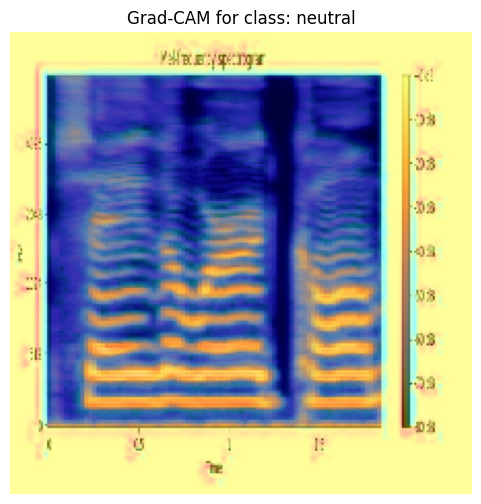

✅ Grad-CAM image saved to: gradcam_outputs/OAF_calm_neutral_gradcam_neutral.jpg

Grad-CAM Analysis for class: neutral
Metric               Value
------------------------------
Model Confidence      91.82% (neutral)
 Grad-CAM Max Activation  = 0.93
Activated Area         = 51.21%,
 Focus Region (time: 0.0–2.97s, freq: 0.0–7926.6Hz)
Confidence Drop (after masking focus region) = 74.96%
mean_activation      0.46167940
max_activation       0.93491471
activated_area_pct   51.21
entropy              9.281
time_focus_range     (0.0, 2.97)
freq_focus_range     (0.0, 7926.6)

Class probabilities:
angry: 0.0064
disgust: 0.0086
fear: 0.0047
happy: 0.0113
neutral: 0.9182
sad: 0.0213
surprise: 0.0296


In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ✅ Define your class names (in the order used for training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def load_model(model_path):
    return tf.keras.models.load_model(model_path)

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_normalized = img_rgb.astype(np.float32) / 255.0
    return np.expand_dims(img_normalized, axis=0)

def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model.")

def compute_gradcam(model, image, class_index, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-6)
    return heatmap.numpy(), predictions.numpy()

def overlay_heatmap(original_image_path, heatmap, alpha=0.4):
    original_image = cv2.imread(original_image_path)
    original_image = cv2.resize(original_image, (224, 224))
    heatmap_resized = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_image, 1 - alpha, heatmap_colored, alpha, 0)
    return superimposed_img, heatmap_resized

def mask_focus_region(image, heatmap_resized, threshold=0.5):
    # Mask out heatmap regions above threshold in the image (for confidence drop calc)
    mask = heatmap_resized > threshold
    masked_image = image.copy()
    # Set masked region pixels to zero (or blur)
    masked_image[mask] = 0
    return masked_image

def calculate_entropy(heatmap):
    # Normalize heatmap to sum to 1 (prob distribution)
    prob_dist = heatmap.flatten()
    prob_dist = prob_dist / (np.sum(prob_dist) + 1e-9)
    entropy = -np.sum(prob_dist * np.log(prob_dist + 1e-9))
    return entropy

def compute_iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    if union == 0:
        return 0.0
    return intersection / union

def run_gradcam(image_path, model, save_dir="gradcam_outputs", ground_truth_mask_path=None):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    class_index = np.argmax(prediction[0])
    class_label = class_names[class_index]
    model_confidence = prediction[0][class_index]

    last_conv_layer_name = find_last_conv_layer(model)
    heatmap, prediction = compute_gradcam(model, preprocessed_image, class_index, last_conv_layer_name)

    original_image = cv2.imread(image_path)
    original_image = cv2.resize(original_image, (224, 224))

    gradcam_image, heatmap_resized = overlay_heatmap(image_path, heatmap)

    # Metrics:
    max_activation = np.max(heatmap)
    activated_area_pct = np.sum(heatmap > 0.5) / heatmap.size * 100
    entropy = calculate_entropy(heatmap)

    # Dummy time and frequency axis ranges for mapping pixel indexes (since no info given)
    total_time_sec = 3.0
    total_freq_hz = 8000.0
    time_resolution = total_time_sec / heatmap.shape[1]
    freq_resolution = total_freq_hz / heatmap.shape[0]

    # Calculate time and freq focus ranges where heatmap > 0.5
    indices = np.argwhere(heatmap > 0.5)
    if indices.size > 0:
        freq_indices = indices[:, 0]
        time_indices = indices[:, 1]
        time_focus_range = (round(time_indices.min() * time_resolution, 2), round(time_indices.max() * time_resolution, 2))
        freq_focus_range = (round(freq_indices.min() * freq_resolution, 1), round(freq_indices.max() * freq_resolution, 1))
    else:
        time_focus_range = (0, 0)
        freq_focus_range = (0, 0)

    # Calculate Confidence drop after masking focus region:
    threshold = 0.5
    mask = heatmap_resized > threshold
    masked_image = mask_focus_region(original_image, heatmap_resized, threshold)

    # Preprocess masked image for model prediction
    masked_image_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
    masked_image_norm = masked_image_rgb.astype(np.float32) / 255.0
    masked_image_input = np.expand_dims(masked_image_norm, axis=0)
    masked_prediction = model.predict(masked_image_input)
    masked_confidence = masked_prediction[0][class_index]

    confidence_drop = (model_confidence - masked_confidence) / (model_confidence + 1e-9) * 100

    # IOU with ground truth segmentation if provided:
    if ground_truth_mask_path:
        gt_mask = cv2.imread(ground_truth_mask_path, cv2.IMREAD_GRAYSCALE)
        gt_mask = cv2.resize(gt_mask, (heatmap.shape[1], heatmap.shape[0]))
        gt_binary = gt_mask > 128
        pred_binary = heatmap > 0.5
        iou_score = compute_iou(gt_binary, pred_binary)
    else:
        iou_score = None

    # Save Grad-CAM result
    os.makedirs(save_dir, exist_ok=True)
    filename = os.path.splitext(os.path.basename(image_path))[0]
    save_path = os.path.join(save_dir, f"{filename}_gradcam_{class_label}.jpg")
    cv2.imwrite(save_path, gradcam_image)

    # Display Grad-CAM
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(gradcam_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Grad-CAM for class: {class_label}")
    plt.show()

    print(f"✅ Grad-CAM image saved to: {save_path}")

    # Print all metrics:
    print(f"\nGrad-CAM Analysis for class: {class_label}")
    print(f"{'Metric':<20} {'Value'}")
    print("-" * 30)
    print(f"Model Confidence      {model_confidence:.2%} ({class_label})")
    print(f" Grad-CAM Max Activation  = {max_activation:.2f}")
    print(f"Activated Area         = {activated_area_pct:.2f}%,")
    print(f" Focus Region (time: {time_focus_range[0]}–{time_focus_range[1]}s, freq: {freq_focus_range[0]}–{freq_focus_range[1]}Hz)")
    print(f"Confidence Drop (after masking focus region) = {confidence_drop:.2f}%")
    if iou_score is not None:
        print(f" (If ground truth segmentation exists) IOU = {iou_score:.2f}")

    print(f"mean_activation      {np.mean(heatmap):.8f}")
    print(f"max_activation       {max_activation:.8f}")
    print(f"activated_area_pct   {activated_area_pct:.2f}")
    print(f"entropy              {entropy:.3f}")
    print(f"time_focus_range     {time_focus_range}")
    print(f"freq_focus_range     {freq_focus_range}")

    # Also print all class probabilities with 4 decimals
    print("\nClass probabilities:")
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {prediction[0][i]:.4f}")

# 🔽 Example usage
model_path = '/kaggle/input/speech-emotion00/tensorflow2/default/1/speech_emotion_model.h5'
image_path = '/kaggle/input/speechemomel/Melspectro/test/neutral/OAF_calm_neutral.png'

model = load_model(model_path)
run_gradcam(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


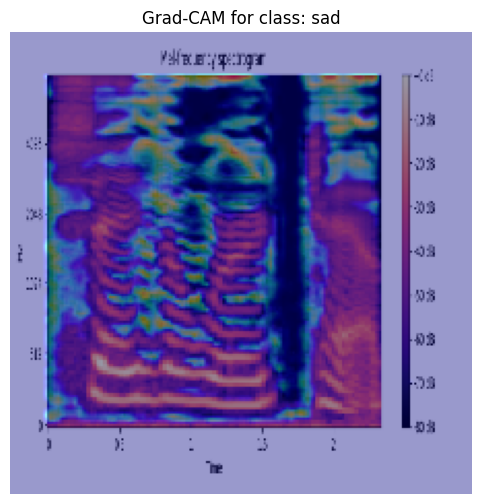

✅ Grad-CAM image saved to: gradcam_outputs/OAF_cab_sad_gradcam_sad.jpg

Grad-CAM Analysis for class: sad
Metric               Value
------------------------------
Model Confidence      71.87% (sad)
 Grad-CAM Max Activation  = 0.92
Activated Area         = 3.64%,
 Focus Region (time: 0.25–2.37s, freq: 733.9–6678.9Hz)
Confidence Drop (after masking focus region) = 3.09%
mean_activation      0.08298303
max_activation       0.91536552
activated_area_pct   3.64
entropy              7.960
time_focus_range     (0.25, 2.37)
freq_focus_range     (733.9, 6678.9)

Class probabilities:
angry: 0.0119
disgust: 0.0536
fear: 0.0152
happy: 0.0407
neutral: 0.1308
sad: 0.7187
surprise: 0.0291


In [3]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ✅ Define your class names (in the order used for training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def load_model(model_path):
    return tf.keras.models.load_model(model_path)

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_normalized = img_rgb.astype(np.float32) / 255.0
    return np.expand_dims(img_normalized, axis=0)

def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model.")

def compute_gradcam(model, image, class_index, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-6)
    return heatmap.numpy(), predictions.numpy()

def overlay_heatmap(original_image_path, heatmap, alpha=0.4):
    original_image = cv2.imread(original_image_path)
    original_image = cv2.resize(original_image, (224, 224))
    heatmap_resized = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_image, 1 - alpha, heatmap_colored, alpha, 0)
    return superimposed_img, heatmap_resized

def mask_focus_region(image, heatmap_resized, threshold=0.5):
    # Mask out heatmap regions above threshold in the image (for confidence drop calc)
    mask = heatmap_resized > threshold
    masked_image = image.copy()
    # Set masked region pixels to zero (or blur)
    masked_image[mask] = 0
    return masked_image

def calculate_entropy(heatmap):
    # Normalize heatmap to sum to 1 (prob distribution)
    prob_dist = heatmap.flatten()
    prob_dist = prob_dist / (np.sum(prob_dist) + 1e-9)
    entropy = -np.sum(prob_dist * np.log(prob_dist + 1e-9))
    return entropy

def compute_iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    if union == 0:
        return 0.0
    return intersection / union

def run_gradcam(image_path, model, save_dir="gradcam_outputs", ground_truth_mask_path=None):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    class_index = np.argmax(prediction[0])
    class_label = class_names[class_index]
    model_confidence = prediction[0][class_index]

    last_conv_layer_name = find_last_conv_layer(model)
    heatmap, prediction = compute_gradcam(model, preprocessed_image, class_index, last_conv_layer_name)

    original_image = cv2.imread(image_path)
    original_image = cv2.resize(original_image, (224, 224))

    gradcam_image, heatmap_resized = overlay_heatmap(image_path, heatmap)

    # Metrics:
    max_activation = np.max(heatmap)
    activated_area_pct = np.sum(heatmap > 0.5) / heatmap.size * 100
    entropy = calculate_entropy(heatmap)

    # Dummy time and frequency axis ranges for mapping pixel indexes (since no info given)
    total_time_sec = 3.0
    total_freq_hz = 8000.0
    time_resolution = total_time_sec / heatmap.shape[1]
    freq_resolution = total_freq_hz / heatmap.shape[0]

    # Calculate time and freq focus ranges where heatmap > 0.5
    indices = np.argwhere(heatmap > 0.5)
    if indices.size > 0:
        freq_indices = indices[:, 0]
        time_indices = indices[:, 1]
        time_focus_range = (round(time_indices.min() * time_resolution, 2), round(time_indices.max() * time_resolution, 2))
        freq_focus_range = (round(freq_indices.min() * freq_resolution, 1), round(freq_indices.max() * freq_resolution, 1))
    else:
        time_focus_range = (0, 0)
        freq_focus_range = (0, 0)

    # Calculate Confidence drop after masking focus region:
    threshold = 0.5
    mask = heatmap_resized > threshold
    masked_image = mask_focus_region(original_image, heatmap_resized, threshold)

    # Preprocess masked image for model prediction
    masked_image_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
    masked_image_norm = masked_image_rgb.astype(np.float32) / 255.0
    masked_image_input = np.expand_dims(masked_image_norm, axis=0)
    masked_prediction = model.predict(masked_image_input)
    masked_confidence = masked_prediction[0][class_index]

    confidence_drop = (model_confidence - masked_confidence) / (model_confidence + 1e-9) * 100

    # IOU with ground truth segmentation if provided:
    if ground_truth_mask_path:
        gt_mask = cv2.imread(ground_truth_mask_path, cv2.IMREAD_GRAYSCALE)
        gt_mask = cv2.resize(gt_mask, (heatmap.shape[1], heatmap.shape[0]))
        gt_binary = gt_mask > 128
        pred_binary = heatmap > 0.5
        iou_score = compute_iou(gt_binary, pred_binary)
    else:
        iou_score = None

    # Save Grad-CAM result
    os.makedirs(save_dir, exist_ok=True)
    filename = os.path.splitext(os.path.basename(image_path))[0]
    save_path = os.path.join(save_dir, f"{filename}_gradcam_{class_label}.jpg")
    cv2.imwrite(save_path, gradcam_image)

    # Display Grad-CAM
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(gradcam_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Grad-CAM for class: {class_label}")
    plt.show()

    print(f"✅ Grad-CAM image saved to: {save_path}")

    # Print all metrics:
    print(f"\nGrad-CAM Analysis for class: {class_label}")
    print(f"{'Metric':<20} {'Value'}")
    print("-" * 30)
    print(f"Model Confidence      {model_confidence:.2%} ({class_label})")
    print(f" Grad-CAM Max Activation  = {max_activation:.2f}")
    print(f"Activated Area         = {activated_area_pct:.2f}%,")
    print(f" Focus Region (time: {time_focus_range[0]}–{time_focus_range[1]}s, freq: {freq_focus_range[0]}–{freq_focus_range[1]}Hz)")
    print(f"Confidence Drop (after masking focus region) = {confidence_drop:.2f}%")
    if iou_score is not None:
        print(f" (If ground truth segmentation exists) IOU = {iou_score:.2f}")

    print(f"mean_activation      {np.mean(heatmap):.8f}")
    print(f"max_activation       {max_activation:.8f}")
    print(f"activated_area_pct   {activated_area_pct:.2f}")
    print(f"entropy              {entropy:.3f}")
    print(f"time_focus_range     {time_focus_range}")
    print(f"freq_focus_range     {freq_focus_range}")

    # Also print all class probabilities with 4 decimals
    print("\nClass probabilities:")
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {prediction[0][i]:.4f}")

# 🔽 Example usage
model_path = '/kaggle/input/speech-emotion00/tensorflow2/default/1/speech_emotion_model.h5'
image_path = '/kaggle/input/speechemomel/Melspectro/test/sad/OAF_cab_sad.png'

model = load_model(model_path)
run_gradcam(image_path, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


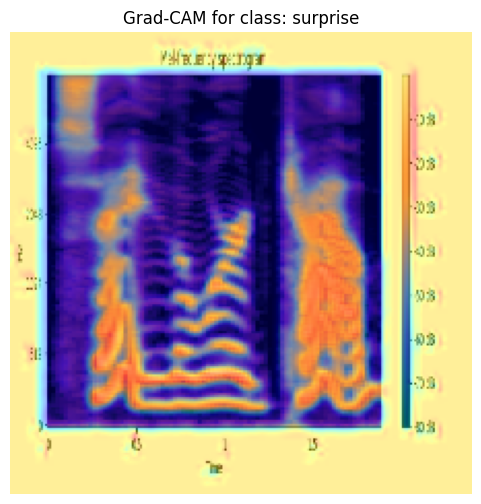

✅ Grad-CAM image saved to: gradcam_outputs/OAF_cab_ps_gradcam_surprise.jpg

Grad-CAM Analysis for class: surprise
Metric               Value
------------------------------
Model Confidence      79.13% (surprise)
 Grad-CAM Max Activation  = 0.98
Activated Area         = 51.18%,
 Focus Region (time: 0.0–2.97s, freq: 0.0–7926.6Hz)
Confidence Drop (after masking focus region) = 55.17%
mean_activation      0.41372573
max_activation       0.98044980
activated_area_pct   51.18
entropy              9.080
time_focus_range     (0.0, 2.97)
freq_focus_range     (0.0, 7926.6)

Class probabilities:
angry: 0.0091
disgust: 0.0315
fear: 0.0158
happy: 0.0541
neutral: 0.0767
sad: 0.0214
surprise: 0.7913


In [4]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# ✅ Define your class names (in the order used for training)
class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

def load_model(model_path):
    return tf.keras.models.load_model(model_path)

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (224, 224))
    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    img_normalized = img_rgb.astype(np.float32) / 255.0
    return np.expand_dims(img_normalized, axis=0)

def find_last_conv_layer(model):
    for layer in reversed(model.layers):
        if isinstance(layer, tf.keras.layers.Conv2D):
            return layer.name
    raise ValueError("No Conv2D layer found in the model.")

def compute_gradcam(model, image, class_index, last_conv_layer_name):
    grad_model = tf.keras.models.Model(
        inputs=model.inputs,
        outputs=[model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(image)
        loss = predictions[:, class_index]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)
    heatmap = tf.maximum(heatmap, 0) / (tf.reduce_max(heatmap) + 1e-6)
    return heatmap.numpy(), predictions.numpy()

def overlay_heatmap(original_image_path, heatmap, alpha=0.4):
    original_image = cv2.imread(original_image_path)
    original_image = cv2.resize(original_image, (224, 224))
    heatmap_resized = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(original_image, 1 - alpha, heatmap_colored, alpha, 0)
    return superimposed_img, heatmap_resized

def mask_focus_region(image, heatmap_resized, threshold=0.5):
    # Mask out heatmap regions above threshold in the image (for confidence drop calc)
    mask = heatmap_resized > threshold
    masked_image = image.copy()
    # Set masked region pixels to zero (or blur)
    masked_image[mask] = 0
    return masked_image

def calculate_entropy(heatmap):
    # Normalize heatmap to sum to 1 (prob distribution)
    prob_dist = heatmap.flatten()
    prob_dist = prob_dist / (np.sum(prob_dist) + 1e-9)
    entropy = -np.sum(prob_dist * np.log(prob_dist + 1e-9))
    return entropy

def compute_iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2).sum()
    union = np.logical_or(mask1, mask2).sum()
    if union == 0:
        return 0.0
    return intersection / union

def run_gradcam(image_path, model, save_dir="gradcam_outputs", ground_truth_mask_path=None):
    preprocessed_image = preprocess_image(image_path)
    prediction = model.predict(preprocessed_image)
    class_index = np.argmax(prediction[0])
    class_label = class_names[class_index]
    model_confidence = prediction[0][class_index]

    last_conv_layer_name = find_last_conv_layer(model)
    heatmap, prediction = compute_gradcam(model, preprocessed_image, class_index, last_conv_layer_name)

    original_image = cv2.imread(image_path)
    original_image = cv2.resize(original_image, (224, 224))

    gradcam_image, heatmap_resized = overlay_heatmap(image_path, heatmap)

    # Metrics:
    max_activation = np.max(heatmap)
    activated_area_pct = np.sum(heatmap > 0.5) / heatmap.size * 100
    entropy = calculate_entropy(heatmap)

    # Dummy time and frequency axis ranges for mapping pixel indexes (since no info given)
    total_time_sec = 3.0
    total_freq_hz = 8000.0
    time_resolution = total_time_sec / heatmap.shape[1]
    freq_resolution = total_freq_hz / heatmap.shape[0]

    # Calculate time and freq focus ranges where heatmap > 0.5
    indices = np.argwhere(heatmap > 0.5)
    if indices.size > 0:
        freq_indices = indices[:, 0]
        time_indices = indices[:, 1]
        time_focus_range = (round(time_indices.min() * time_resolution, 2), round(time_indices.max() * time_resolution, 2))
        freq_focus_range = (round(freq_indices.min() * freq_resolution, 1), round(freq_indices.max() * freq_resolution, 1))
    else:
        time_focus_range = (0, 0)
        freq_focus_range = (0, 0)

    # Calculate Confidence drop after masking focus region:
    threshold = 0.5
    mask = heatmap_resized > threshold
    masked_image = mask_focus_region(original_image, heatmap_resized, threshold)

    # Preprocess masked image for model prediction
    masked_image_rgb = cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB)
    masked_image_norm = masked_image_rgb.astype(np.float32) / 255.0
    masked_image_input = np.expand_dims(masked_image_norm, axis=0)
    masked_prediction = model.predict(masked_image_input)
    masked_confidence = masked_prediction[0][class_index]

    confidence_drop = (model_confidence - masked_confidence) / (model_confidence + 1e-9) * 100

    # IOU with ground truth segmentation if provided:
    if ground_truth_mask_path:
        gt_mask = cv2.imread(ground_truth_mask_path, cv2.IMREAD_GRAYSCALE)
        gt_mask = cv2.resize(gt_mask, (heatmap.shape[1], heatmap.shape[0]))
        gt_binary = gt_mask > 128
        pred_binary = heatmap > 0.5
        iou_score = compute_iou(gt_binary, pred_binary)
    else:
        iou_score = None

    # Save Grad-CAM result
    os.makedirs(save_dir, exist_ok=True)
    filename = os.path.splitext(os.path.basename(image_path))[0]
    save_path = os.path.join(save_dir, f"{filename}_gradcam_{class_label}.jpg")
    cv2.imwrite(save_path, gradcam_image)

    # Display Grad-CAM
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(gradcam_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(f"Grad-CAM for class: {class_label}")
    plt.show()

    print(f"✅ Grad-CAM image saved to: {save_path}")

    # Print all metrics:
    print(f"\nGrad-CAM Analysis for class: {class_label}")
    print(f"{'Metric':<20} {'Value'}")
    print("-" * 30)
    print(f"Model Confidence      {model_confidence:.2%} ({class_label})")
    print(f" Grad-CAM Max Activation  = {max_activation:.2f}")
    print(f"Activated Area         = {activated_area_pct:.2f}%,")
    print(f" Focus Region (time: {time_focus_range[0]}–{time_focus_range[1]}s, freq: {freq_focus_range[0]}–{freq_focus_range[1]}Hz)")
    print(f"Confidence Drop (after masking focus region) = {confidence_drop:.2f}%")
    if iou_score is not None:
        print(f" (If ground truth segmentation exists) IOU = {iou_score:.2f}")

    print(f"mean_activation      {np.mean(heatmap):.8f}")
    print(f"max_activation       {max_activation:.8f}")
    print(f"activated_area_pct   {activated_area_pct:.2f}")
    print(f"entropy              {entropy:.3f}")
    print(f"time_focus_range     {time_focus_range}")
    print(f"freq_focus_range     {freq_focus_range}")

    # Also print all class probabilities with 4 decimals
    print("\nClass probabilities:")
    for i, class_name in enumerate(class_names):
        print(f"{class_name}: {prediction[0][i]:.4f}")

# 🔽 Example usage
model_path = '/kaggle/input/speech-emotion00/tensorflow2/default/1/speech_emotion_model.h5'
image_path = '/kaggle/input/speechemomel/Melspectro/test/surprise/OAF_cab_ps.png'

model = load_model(model_path)
run_gradcam(image_path, model)